<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

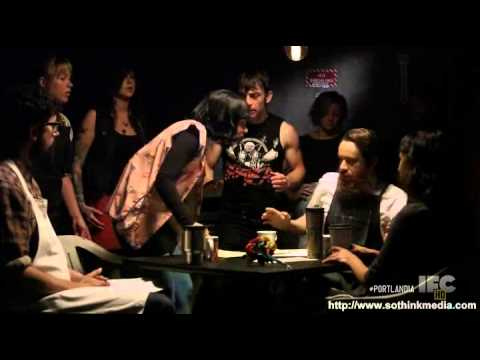

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\luis_\\Desktop\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [5]:
shops.head(3)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating


In [6]:
shops.shape

(7616, 3)

In [7]:
shops['coffee_shop_name'].value_counts(normalize=True)

Epoch Coffee                            0.052521
Halcyon                                 0.039391
The Factory - Cafe With a Soul          0.032038
Venezia Italian Gelato                  0.026261
Houndstooth Coffee                      0.026261
                                          ...   
Lucky Lab Coffee                        0.003283
Sister Coffee                           0.002232
Kowabunga Coffee                        0.002101
The Marvelous Vintage Tea Party Co.     0.001313
Lola Savannah Coffee Downtown           0.000525
Name: coffee_shop_name, Length: 79, dtype: float64

In [8]:
shops.tail()

,coffee_shop_name,full_review_text,star_rating
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating
7615,The Steeping Room,5/23/2015 I finally stopped in for lunch with...,4.0 star rating


In [9]:
shops['star_rating'][0]

' 5.0 star rating '

In [10]:
shops['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [11]:
import string


def data_cleaning(df):
    '''
    data cleaning function
    
    df(Pandas DataFrame object)
    
    returns:
        a clean dataset lol
    '''
    df = df.copy()
    df['full_review_text'] = df['full_review_text'].str.lower()
    df['full_review_text'] = df['full_review_text'].str.strip()
    df['star_rating'] = df['star_rating'].str.strip('star rating')
    df['star_rating'] = df['star_rating'].str.strip()
    df['star_rating'] = pd.to_numeric(df['star_rating'])
    df['coffee_shop_name'] = df['coffee_shop_name'].str.strip()
    df['full_review_text'] = df['full_review_text'].str.lstrip(f"{string.digits}/{string.digits}/{string.digits}")
    return df

In [12]:
shops = data_cleaning(shops)

In [13]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! ev...,5.0
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aus...",4.0
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the...,4.0
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating ho...,2.0
4,The Factory - Cafe With a Soul,1 check-in they are located within the northc...,4.0


In [14]:
shops.tail()

,coffee_shop_name,full_review_text,star_rating
7611,The Steeping Room,i actually step into this restaurant by chanc...,4.0
7612,The Steeping Room,"ok, the steeping room is awesome. how do they...",5.0
7613,The Steeping Room,"loved coming here for tea, and the atmosphere...",4.0
7614,The Steeping Room,the food is just average. the booths didn't f...,3.0
7615,The Steeping Room,i finally stopped in for lunch with my collea...,4.0


In [15]:
# !pip install datefinder

In [16]:
# import datefinder

# strings = shops['full_review_text'][0]

# match = datefinder.find_dates(strings)

# for date in match:
#     shops['full_review_text'][0].str.strip('/')
import string

# strings = shops['full_review_text'][0]

# x = strings.lstrip(f"{string.digits}/{string.digits}/{string.digits}")
# print(x)

In [17]:
# shops['full_review_text'] = shops['full_review_text'].str.lstrip(f"{string.digits}/{string.digits}/{string.digits}")

In [18]:
shops.head(5)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! ev...,5.0
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aus...",4.0
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the...,4.0
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating ho...,2.0
4,The Factory - Cafe With a Soul,1 check-in they are located within the northc...,4.0


In [19]:
bad_shops = shops[shops['star_rating']<=3]
good_shops = shops[shops['star_rating']>=4]

In [20]:
good_shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in love love loved the atmosphere! ev...,5.0
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aus...",4.0
2,The Factory - Cafe With a Soul,1 check-in listed in brunch spots i loved the...,4.0
4,The Factory - Cafe With a Soul,1 check-in they are located within the northc...,4.0
5,The Factory - Cafe With a Soul,1 check-in very cute cafe! i think from the m...,4.0


In [21]:
tokenizer = Tokenizer(nlp.vocab)

bad_shops['tokens'] = bad_shops['full_review_text'].apply(tokenizer)

C:\Users\luis_\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
bad_shops['tokens']

3       ( , very, cool, decor!, good, drinks, nice, se...
8       ( , 1, check-in, ok,, let's, try, this, approa...
11      ( , the, store, has, a+, decoration,, but, hon...
12      ( , 1, check-in, listed, in, 2016, -, the, thi...
25      ( , okay,, so, after, visiting, my, friends, i...
                              ...                        
7582    ( , i, should, probably, give, this, spot, 4, ...
7583    ( , it's, a, lovely, little, tea, and, pastry,...
7590    ( , so, today, i, tried, this, place., i, have...
7600    ( , great, service, with, unimaginative, and, ...
7614    ( , the, food, is, just, average., the, booths...
Name: tokens, Length: 1476, dtype: object

In [23]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [24]:
good_shops['tokens'] = good_shops['full_review_text'].apply(tokenizer)

C:\Users\luis_\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
good_shops['tokens']

0       ( , 1, check-in, love, love, loved, the, atmos...
1       ( , listed, in, date, night:, austin,, ambianc...
2       ( , 1, check-in, listed, in, brunch, spots, i,...
4       ( , 1, check-in, they, are, located, within, t...
5       ( , 1, check-in, very, cute, cafe!, i, think, ...
                              ...                        
7610    ( , great, food!, i, haven't, had, a, meal, i,...
7611    ( , i, actually, step, into, this, restaurant,...
7612    ( , ok,, the, steeping, room, is, awesome., ho...
7613    ( , loved, coming, here, for, tea,, and, the, ...
7615    ( , i, finally, stopped, in, for, lunch, with,...
Name: tokens, Length: 6140, dtype: object

In [26]:
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(good_shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

good_shops['tokens'] = tokens

C:\Users\luis_\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
good_shops['tokens']

0       [ , 1, check-in, love, love, loved, the, atmos...
1       [ , listed, in, date, night:, austin,, ambianc...
2       [ , 1, check-in, listed, in, brunch, spots, i,...
4       [ , 1, check-in, they, are, located, within, t...
5       [ , 1, check-in, very, cute, cafe!, i, think, ...
                              ...                        
7610    [ , great, food!, i, haven't, had, a, meal, i,...
7611    [ , i, actually, step, into, this, restaurant,...
7612    [ , ok,, the, steeping, room, is, awesome., ho...
7613    [ , loved, coming, here, for, tea,, and, the, ...
7615    [ , i, finally, stopped, in, for, lunch, with,...
Name: tokens, Length: 6140, dtype: object

In [28]:
bad_shop_wc = count(good_shops['tokens'])
good_shop_wc = count(bad_shops['tokens'])

In [29]:
top_20_gs = good_shop_wc[good_shop_wc['rank']<=20]


# wc_top20 = wc[wc['rank'] <= 20]


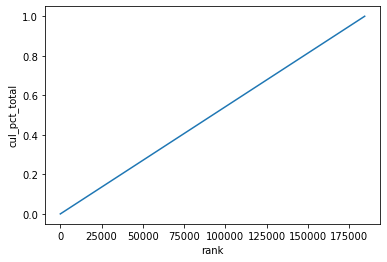

In [30]:
sns.lineplot(x='rank',y='cul_pct_total',data=good_shop_wc);

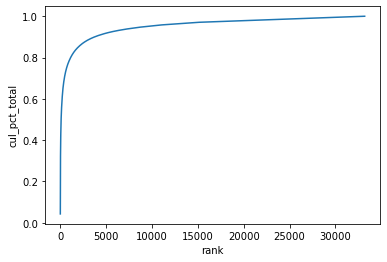

In [31]:
sns.lineplot(x='rank',y='cul_pct_total',data=bad_shop_wc);

In [32]:
top_20_gs

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16,,1,1,1.0,0.000005,0.000005,0.000678
33,very,1,1,2.0,0.000005,0.000011,0.000678
49,cool,1,1,3.0,0.000005,0.000016,0.000678
66,decor!,1,1,4.0,0.000005,0.000022,0.000678
23,good,1,1,5.0,0.000005,0.000027,0.000678
40,drinks,1,1,6.0,0.000005,0.000033,0.000678
56,nice,1,1,7.0,0.000005,0.000038,0.000678
0,seating,1,1,8.0,0.000005,0.000043,0.000678
3,,1,1,9.0,0.000005,0.000049,0.000678
19,however...,1,1,10.0,0.000005,0.000054,0.000678


In [33]:
good_shop_wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16,,1,1,1.0,0.000005,0.000005,0.000678
33,very,1,1,2.0,0.000005,0.000011,0.000678
49,cool,1,1,3.0,0.000005,0.000016,0.000678
66,decor!,1,1,4.0,0.000005,0.000022,0.000678
23,good,1,1,5.0,0.000005,0.000027,0.000678
...,...,...,...,...,...,...,...
184297,back,1,1,184323.0,0.000005,0.999978,0.000678
184304,or,1,1,184324.0,0.000005,0.999984,0.000678
184315,recommend,1,1,184325.0,0.000005,0.999989,0.000678
184282,this,1,1,184326.0,0.000005,0.999995,0.000678


In [34]:
bad_shop_wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
29,the,5479,26491,1.0,0.042925,0.042925,0.892345
0,and,5537,21146,2.0,0.034264,0.077189,0.901792
38,,6140,17766,3.0,0.028787,0.105977,1.000000
39,a,4978,17634,4.0,0.028574,0.134550,0.810749
37,i,4328,14764,5.0,0.023923,0.158474,0.704886
...,...,...,...,...,...,...,...
33184,actuality.,1,1,33186.0,0.000002,0.999994,0.000163
33185,crass.,1,1,33187.0,0.000002,0.999995,0.000163
33186,restrictions.,1,1,33188.0,0.000002,0.999997,0.000163
33188,"specially,",1,1,33189.0,0.000002,0.999998,0.000163


In [35]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(good_shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

good_shops['tokens'] = tokens

C:\Users\luis_\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(bad_shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

bad_shops['tokens'] = tokens

C:\Users\luis_\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
good_shop_wc = count(good_shops['tokens'])
bad_shop_wc = count(bad_shops['tokens'])

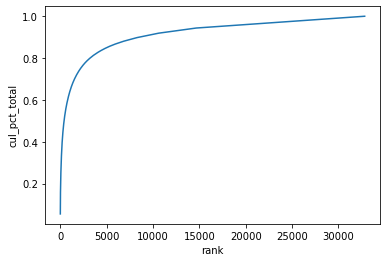

In [38]:
sns.lineplot(x='rank',y='cul_pct_total',data=good_shop_wc);

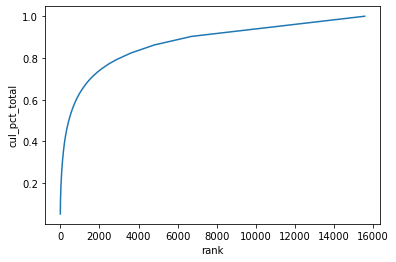

In [39]:
sns.lineplot(x='rank',y='cul_pct_total',data=bad_shop_wc);

In [45]:
bad_shop_wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,,1476,4840,1.0,0.052837,0.052837,1.000000
2,coffee,827,1637,2.0,0.017871,0.070707,0.560298
147,place,597,875,3.0,0.009552,0.080259,0.404472
13,like,548,834,4.0,0.009105,0.089364,0.371274
198,it's,414,617,5.0,0.006736,0.096099,0.280488
...,...,...,...,...,...,...,...
15553,"house"",",1,1,15557.0,0.000011,0.999956,0.000678
15554,imo,1,1,15558.0,0.000011,0.999967,0.000678
15558,4.,1,1,15559.0,0.000011,0.999978,0.000678
15560,efficient,1,1,15560.0,0.000011,0.999989,0.000678


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


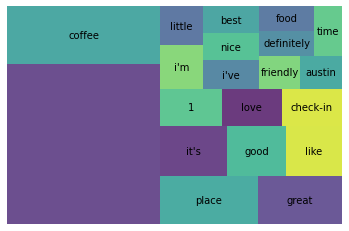

In [40]:

# top 20 words of good shops
goodshop_top20 = good_shop_wc[good_shop_wc['rank'] <= 20]

squarify.plot(sizes=goodshop_top20['pct_total'], label=goodshop_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

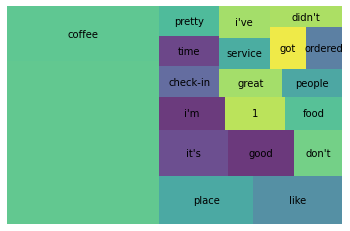

In [41]:
# top 20 words of bad shops

badshop_top20 = bad_shop_wc[bad_shop_wc['rank'] <= 20]

squarify.plot(sizes=badshop_top20['pct_total'], label=badshop_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

